In [15]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans ,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [16]:
df = pd.read_csv('ObesityDataSet_Cleaned.csv')
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight,24.39
1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight,23.77
2,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I,26.85
3,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II,28.34
4,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0,Normal_Weight,20.20


In [17]:
obese = df['NObeyesdad']
obese
features_to_drop = [
    'Weight',      # Outcome variable - menyebabkan circular reasoning
    'Height',      # Physical measurement - sudah implicit dalam behavioral patterns  
    'SMOKE',       # Kurang langsung terkait dengan pola obesitas
    'CH2O',        # Water intake - dampak minimal pada clustering perilaku
    'SCC',         # Calorie monitoring - perilaku yang jarang dan tidak konsisten
    'CALC',        # Alcohol consumption - dampak ambigu dan kompleks 
]
df = df.drop(columns="NObeyesdad")
df = df.drop(columns=features_to_drop)

df


,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,FAF,TUE,MTRANS,BMI
0,21.000000,1,0,2.0,3.0,2,0.000000,1.000000,3,24.39
1,23.000000,1,0,2.0,3.0,2,2.000000,1.000000,3,23.77
2,27.000000,0,0,3.0,3.0,2,2.000000,0.000000,4,26.85
3,22.000000,0,0,2.0,1.0,2,0.000000,0.000000,3,28.34
4,29.000000,0,1,2.0,3.0,2,0.000000,0.000000,0,20.20
...,...,...,...,...,...,...,...,...,...,...
1909,20.976842,1,1,3.0,3.0,2,1.676269,0.906247,3,44.90
1910,21.982942,1,1,3.0,3.0,2,1.341390,0.599270,3,43.74
1911,22.524036,1,1,3.0,3.0,2,1.414209,0.646288,3,43.54
1912,24.361936,1,1,3.0,3.0,2,1.139107,0.586035,3,44.07


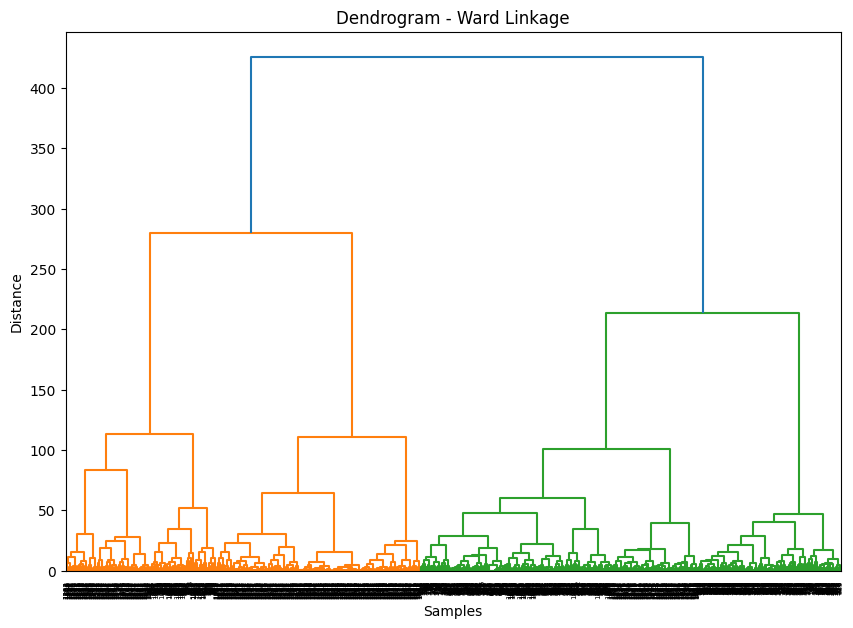

In [18]:
agg_ward = AgglomerativeClustering(n_clusters=3, linkage="ward", metric="euclidean")
labels_ward = agg_ward.fit_predict(df)

agg_avg = AgglomerativeClustering(n_clusters=3, linkage="average")
labels_avg = agg_avg.fit_predict(df)
agg_complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
labels_complete = agg_complete.fit_predict(df)

# Visualisasi Dendrogram
linked = linkage(df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  




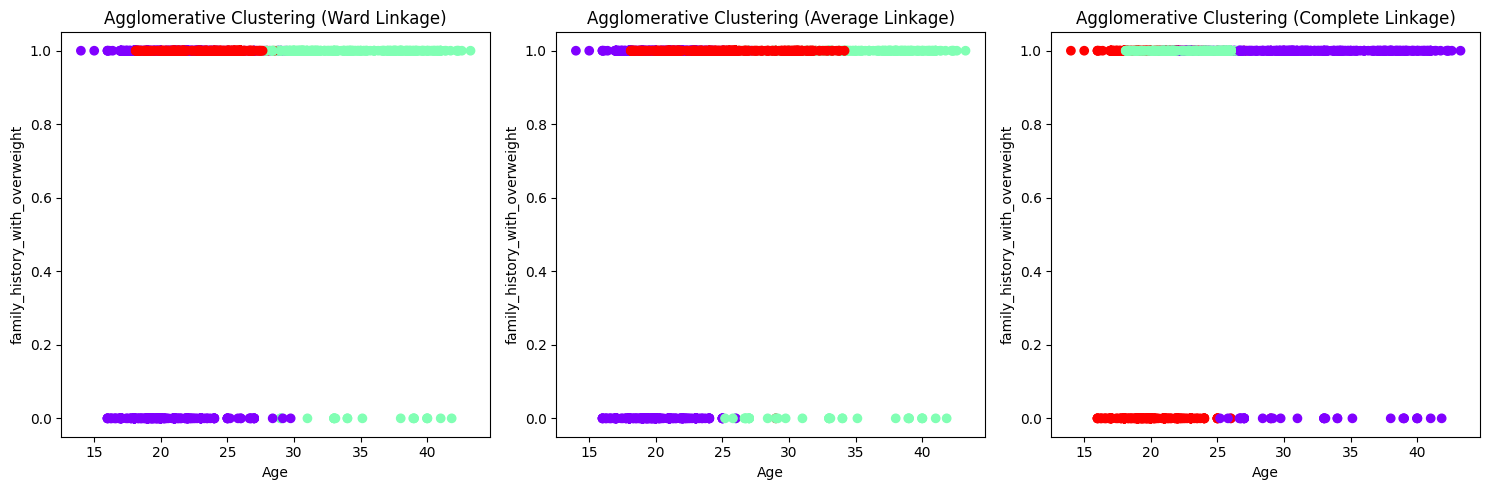

In [19]:
# Visualisasi Hasil Clustering
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels_ward, cmap='rainbow')
plt.title('Agglomerative Clustering (Ward Linkage)')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.subplot(1, 3, 2)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels_avg, cmap='rainbow')
plt.title('Agglomerative Clustering (Average Linkage)')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.subplot(1, 3, 3)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels_complete, cmap='rainbow')
plt.title('Agglomerative Clustering (Complete Linkage)')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.tight_layout()
plt.show()


In [20]:
# Menambahkan label cluster ke DataFrame asli
df['Cluster_Ward'] = labels_ward
df['Cluster_Avg'] = labels_avg
df['Cluster_Complete'] = labels_complete
df.head()

,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,FAF,TUE,MTRANS,BMI,Cluster_Ward,Cluster_Avg,Cluster_Complete
0,21.0,1,0,2.0,3.0,2,0.0,1.0,3,24.39,0,0,2
1,23.0,1,0,2.0,3.0,2,2.0,1.0,3,23.77,0,0,2
2,27.0,0,0,3.0,3.0,2,2.0,0.0,4,26.85,0,1,0
3,22.0,0,0,2.0,1.0,2,0.0,0.0,3,28.34,0,0,2
4,29.0,0,1,2.0,3.0,2,0.0,0.0,0,20.20,1,1,2


Cluster Summary (Ward Linkage):
                    Age  family_history_with_overweight      FAVC      FCVC  \
Cluster_Ward                                                                  
0             20.802180                        0.720617  0.846821  2.258082   
1             34.161660                        0.943548  0.922043  2.362344   
2             23.912176                        1.000000  0.994048  2.773488   

                   NCP      CAEC       FAF       TUE    MTRANS        BMI  \
Cluster_Ward                                                                
0             2.621075  1.863198  1.124900  0.784247  2.743738  24.839740   
1             2.586513  1.954301  0.925275  0.407231  0.650538  31.517984   
2             2.885693  1.998016  0.802542  0.588905  2.876984  40.011250   

              Cluster_Avg  Cluster_Complete  
Cluster_Ward                                 
0                0.039499          1.651252  
1                1.341398          0.021505  
2 

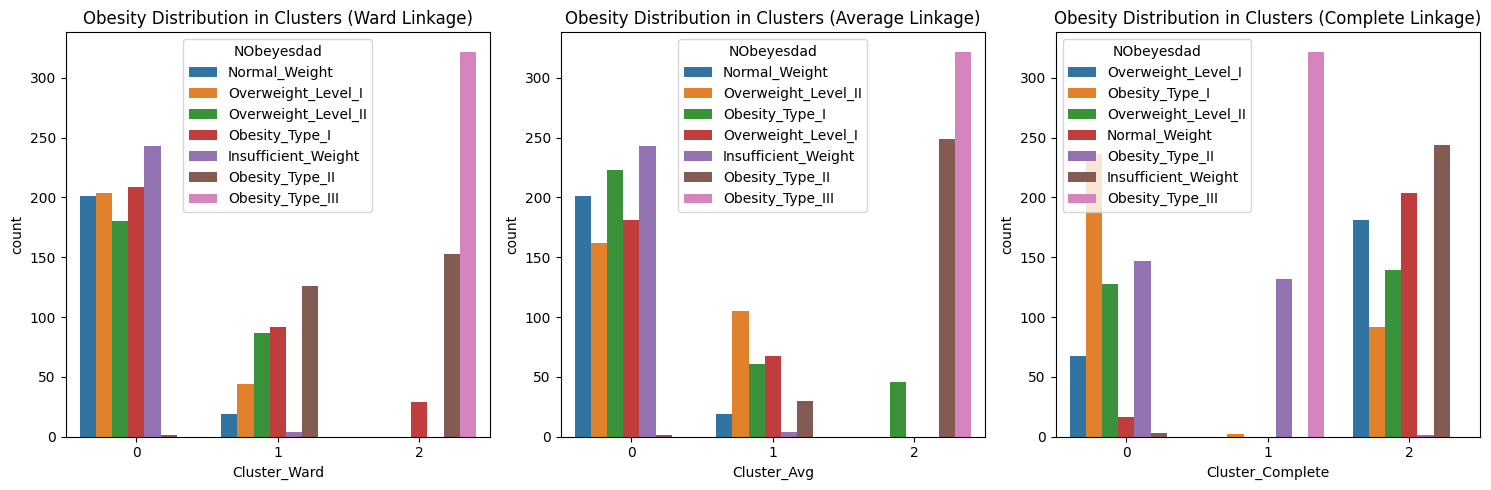

In [21]:
# Analisis Cluster
cluster_summary_ward = df.groupby('Cluster_Ward').mean()
cluster_summary_avg = df.groupby('Cluster_Avg').mean()
cluster_summary_complete = df.groupby('Cluster_Complete').mean()

print("Cluster Summary (Ward Linkage):")
print(cluster_summary_ward)
print("\nCluster Summary (Average Linkage):")
print(cluster_summary_avg)
print("\nCluster Summary (Complete Linkage):")
print(cluster_summary_complete)

# Visualisasi Distribusi Obesitas dalam Cluster
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Cluster_Ward', hue=obese, data=df)
plt.title('Obesity Distribution in Clusters (Ward Linkage)')
plt.subplot(1, 3, 2)
sns.countplot(x='Cluster_Avg', hue=obese, data=df)
plt.title('Obesity Distribution in Clusters (Average Linkage)')
plt.subplot(1, 3, 3)
sns.countplot(x='Cluster_Complete', hue=obese, data=df)
plt.title('Obesity Distribution in Clusters (Complete Linkage)')
plt.tight_layout()
plt.show()

In [22]:
#Evaluasi Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_ward = silhouette_score(df.drop(columns=['Cluster_Ward', 'Cluster_Avg', 'Cluster_Complete']), labels_ward)
silhouette_avg = silhouette_score(df.drop(columns=['Cluster_Ward', 'Cluster_Avg', 'Cluster_Complete']), labels_avg)
silhouette_complete = silhouette_score(df.drop(columns=['Cluster_Ward', 'Cluster_Avg', 'Cluster_Complete']), labels_complete)
print(f'Silhouette Score (Ward Linkage): {silhouette_ward}')
print(f'Silhouette Score (Average Linkage): {silhouette_avg}')
print(f'Silhouette Score (Complete Linkage): {silhouette_complete}')

Silhouette Score (Ward Linkage): 0.4487812534938008
Silhouette Score (Average Linkage): 0.45119421969066104
Silhouette Score (Complete Linkage): 0.3917958539984553


In [23]:
#Menggunakan Data Dengan one-hot encoding untuk variabel kategorikal

df = pd.read_csv('CleanData2.csv')
df = df.drop(columns="NObeyesdad")
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,...,0,1,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,...,0,1,0,0,1,0,0,0,1,0
2,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,...,0,1,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,...,0,1,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,...,0,1,0,0,1,0,0,0,1,0


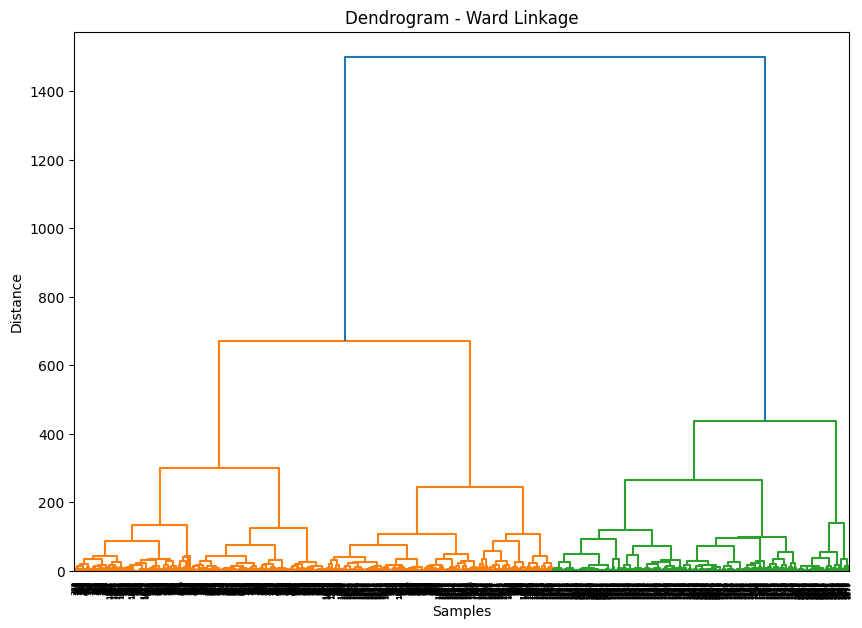

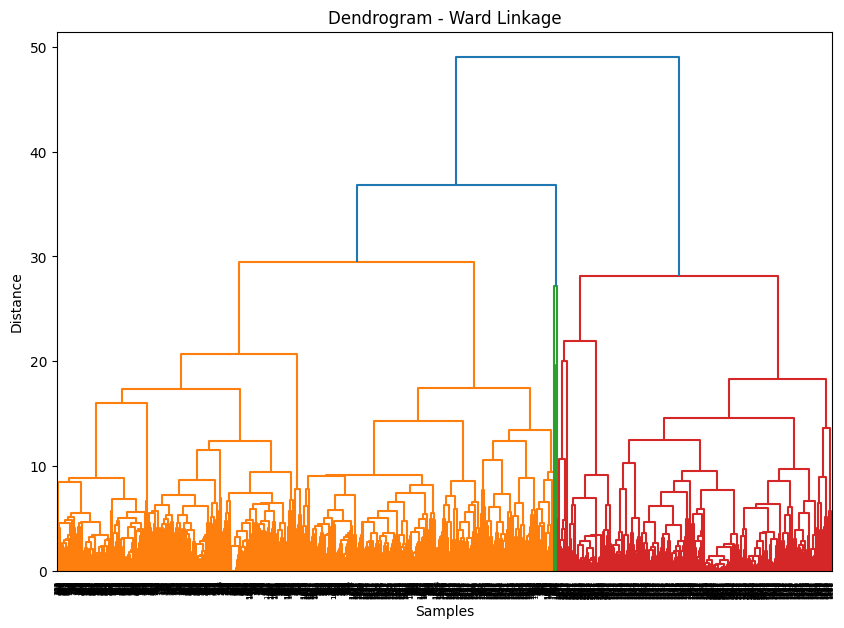

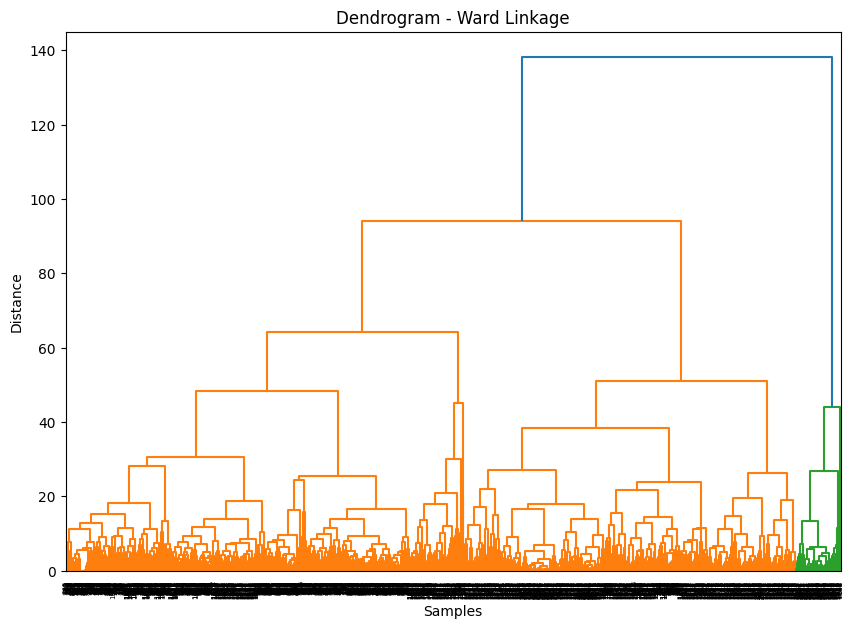

In [24]:
agg_ward = AgglomerativeClustering(n_clusters=3, linkage="ward", metric="euclidean")
labels_ward = agg_ward.fit_predict(df)

agg_avg = AgglomerativeClustering(n_clusters=3, linkage="average")
labels_avg = agg_avg.fit_predict(df)

agg_complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
labels_complete = agg_complete.fit_predict(df)

# Visualisasi Dendrogram
linked = linkage(df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  

linked = linkage(df, method='average')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  

linked = linkage(df, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  


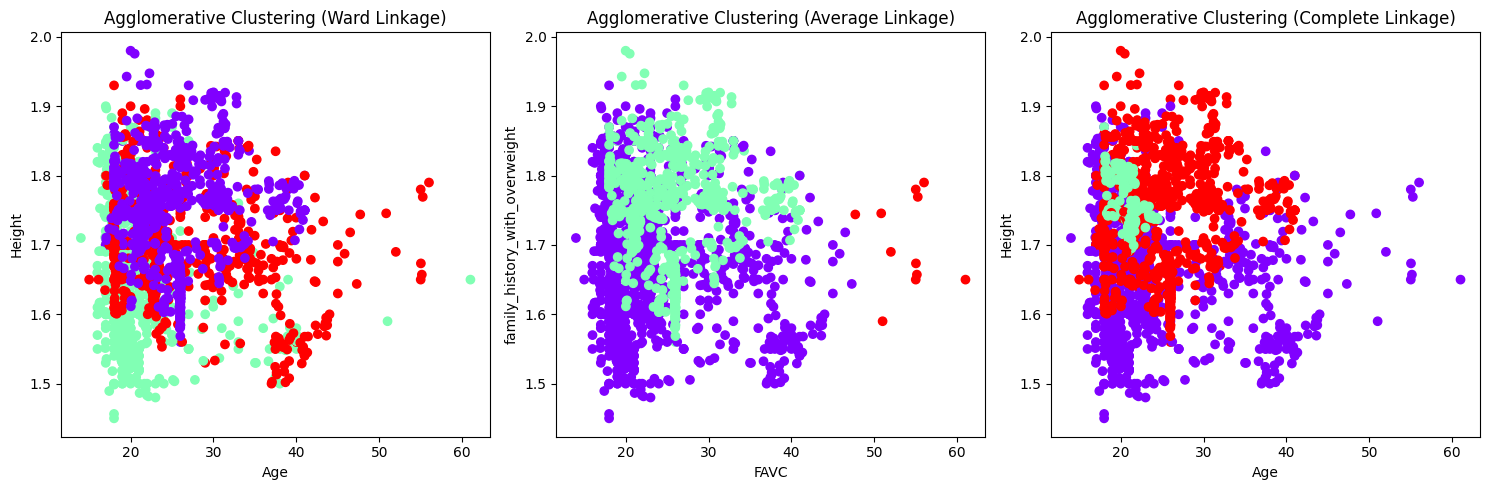

In [25]:
# Visualisasi Hasil Clustering
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels_ward, cmap='rainbow')
plt.title('Agglomerative Clustering (Ward Linkage)')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.subplot(1, 3, 2)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels_avg, cmap='rainbow')
plt.title('Agglomerative Clustering (Average Linkage)')
plt.xlabel(df.columns[4])
plt.ylabel(df.columns[3])
plt.subplot(1, 3, 3)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels_complete, cmap='rainbow')
plt.title('Agglomerative Clustering (Complete Linkage)')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.tight_layout()
plt.show()

In [26]:
df['Cluster_Ward'] = labels_ward
df['Cluster_Avg'] = labels_avg
df['Cluster_Complete'] = labels_complete
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Cluster_Ward,Cluster_Avg,Cluster_Complete
0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,...,0,0,1,0,0,1,0,1,0,0
1,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,...,0,1,0,0,0,1,0,1,0,0
2,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,...,1,0,0,0,0,1,0,2,0,0
3,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,...,1,0,0,0,0,0,1,2,0,2
4,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,...,0,1,0,0,0,1,0,2,0,2


Cluster Summary (Ward Linkage):
                    Age    Height      Weight  family_history_with_overweight  \
Cluster_Ward                                                                    
0             25.415895  1.742003  114.660260                        0.993820   
1             20.970612  1.653805   57.443596                        0.519766   
2             26.558177  1.701796   82.050148                        0.915994   

                  FAVC      FCVC       NCP     SMOKE      CH2O       SCC  ...  \
Cluster_Ward                                                              ...   
0             0.981459  2.581064  2.809582  0.023486  2.111297  0.002472  ...   
1             0.761347  2.362819  2.696526  0.021962  1.903248  0.112738  ...   
2             0.891761  2.269328  2.511602  0.016155  1.988617  0.027464  ...   

               CAEC_no  CALC_Frequently  CALC_Sometimes   CALC_no  \
Cluster_Ward                                                        
0             0.00

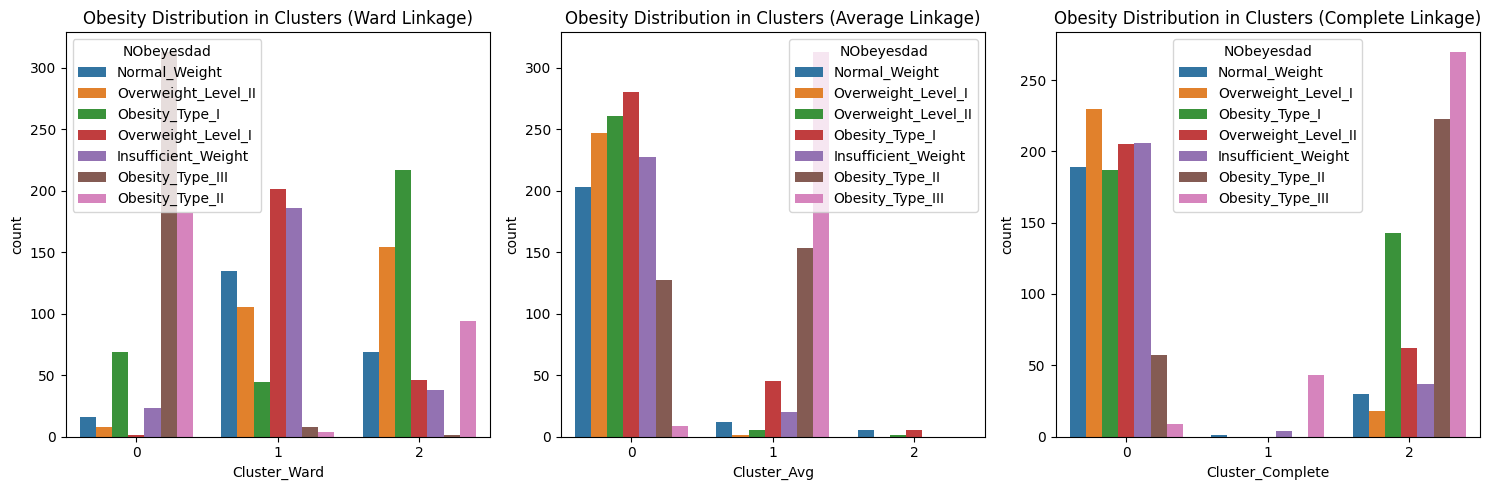

In [27]:
# Analisis Cluster
cluster_summary_ward = df.groupby('Cluster_Ward').mean()
cluster_summary_avg = df.groupby('Cluster_Avg').mean()
cluster_summary_complete = df.groupby('Cluster_Complete').mean()

print("Cluster Summary (Ward Linkage):")
print(cluster_summary_ward)
print("\nCluster Summary (Average Linkage):")
print(cluster_summary_avg)
print("\nCluster Summary (Complete Linkage):")
print(cluster_summary_complete)

# Visualisasi Distribusi Obesitas dalam Cluster
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Cluster_Ward', hue=obese, data=df)
plt.title('Obesity Distribution in Clusters (Ward Linkage)')
plt.subplot(1, 3, 2)
sns.countplot(x='Cluster_Avg', hue=obese, data=df)
plt.title('Obesity Distribution in Clusters (Average Linkage)')
plt.subplot(1, 3, 3)
sns.countplot(x='Cluster_Complete', hue=obese, data=df)
plt.title('Obesity Distribution in Clusters (Complete Linkage)')
plt.tight_layout()
plt.show()

In [28]:
#Evaluasi Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_ward = silhouette_score(df.drop(columns=['Cluster_Ward', 'Cluster_Avg', 'Cluster_Complete']), labels_ward)
silhouette_avg = silhouette_score(df.drop(columns=['Cluster_Ward', 'Cluster_Avg', 'Cluster_Complete']), labels_avg)
silhouette_complete = silhouette_score(df.drop(columns=['Cluster_Ward', 'Cluster_Avg', 'Cluster_Complete']), labels_complete)
print(f'Silhouette Score (Ward Linkage): {silhouette_ward}')
print(f'Silhouette Score (Average Linkage): {silhouette_avg}')
print(f'Silhouette Score (Complete Linkage): {silhouette_complete}')

Silhouette Score (Ward Linkage): 0.4744304102604389
Silhouette Score (Average Linkage): 0.45491932683045144
Silhouette Score (Complete Linkage): 0.43575912498924557
